<a href="https://colab.research.google.com/github/alexkabu-M2K/Google_Colab_AI_Estacio/blob/main/Aplica%C3%A7%C3%A3o_Analise_Vendas_Livraria_Gemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analisar as vendas por categoria

### Subtask:
Calcular métricas de vendas importantes para cada categoria, como receita total, quantidade vendida, número de livros, etc.

**Reasoning**:
Calculate the total revenue, total quantity sold, and number of books for each category by grouping the DataFrame and applying aggregation functions.

In [7]:
df['Receita por Livro'] = df['Preço'] * df['Quantidade Vendida']

df_categoria_analise = df.groupby('Categoria').agg(
    {'Receita por Livro': 'sum',
     'Quantidade Vendida': 'sum',
     'Título': 'count'}
).reset_index()

df_categoria_analise = df_categoria_analise.rename(columns={
    'Receita por Livro': 'Receita Total',
    'Quantidade Vendida': 'Quantidade Total Vendida',
    'Título': 'Número de Livros'
})

display(df_categoria_analise)

,Categoria,Receita Total,Quantidade Total Vendida,Número de Livros
0,Fantasia,16882.111067,274,13
1,Ficção,19642.270775,429,21
2,Não Ficção,29975.749734,617,23
3,Romance,28509.527439,558,25
4,Suspense,18489.430196,389,18


# Task
Crie uma aplicação em python para fazer analise das vendas de livros, com 5 categorias principais, para uma livraria.

## Carregar os dados

### Subtask:
Carregar os dados de vendas dos livros (assumindo que estejam em um arquivo CSV, por exemplo) em um DataFrame pandas.


**Reasoning**:
Import the pandas library, read the CSV file into a DataFrame, and display the first few rows and the DataFrame's information.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('vendas_livros.csv')
    display(df.head())
    df.info()
except FileNotFoundError:
    print("Error: 'vendas_livros.csv' not found. Please make sure the file is in the correct directory.")
    df = None


Error: 'vendas_livros.csv' not found. Please make sure the file is in the correct directory.


**Reasoning**:
Since the file was not found, I will create a dummy DataFrame with relevant columns and display its head and info to simulate loading data and proceed with the subsequent steps.



In [2]:
import numpy as np

data = {
    'Categoria': np.random.choice(['Ficção', 'Não Ficção', 'Suspense', 'Romance', 'Fantasia'], size=100),
    'Título': [f'Livro {i}' for i in range(1, 101)],
    'Autor': [f'Autor {i}' for i in range(1, 101)],
    'Preço': np.random.uniform(10, 100, size=100),
    'Quantidade Vendida': np.random.randint(1, 50, size=100),
    'Data Venda': pd.to_datetime(pd.date_range(start='2023-01-01', periods=100, freq='D'))
}
df = pd.DataFrame(data)

display(df.head())
df.info()

,Categoria,Título,Autor,Preço,Quantidade Vendida,Data Venda
0,Romance,Livro 1,Autor 1,80.385517,5,2023-01-01
1,Suspense,Livro 2,Autor 2,91.623317,23,2023-01-02
2,Romance,Livro 3,Autor 3,30.288790,45,2023-01-03
3,Ficção,Livro 4,Autor 4,92.945056,8,2023-01-04
4,Romance,Livro 5,Autor 5,48.301601,46,2023-01-05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Categoria           100 non-null    object        
 1   Título              100 non-null    object        
 2   Autor               100 non-null    object        
 3   Preço               100 non-null    float64       
 4   Quantidade Vendida  100 non-null    int64         
 5   Data Venda          100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 4.8+ KB


## Pré-processar os dados

### Subtask:
Limpar e preparar os dados para análise, incluindo a conversão de tipos de dados, tratamento de valores ausentes e padronização de nomes de categorias, se necessário.


**Reasoning**:
Verify the presence of missing values in the DataFrame and check the data types of each column.



In [3]:
display(df.isnull().sum())
display(df.info())

,0
Categoria,0
Título,0
Autor,0
Preço,0
Quantidade Vendida,0
Data Venda,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Categoria           100 non-null    object        
 1   Título              100 non-null    object        
 2   Autor               100 non-null    object        
 3   Preço               100 non-null    float64       
 4   Quantidade Vendida  100 non-null    int64         
 5   Data Venda          100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 4.8+ KB


None

**Reasoning**:
Check unique values in the 'Categoria' column to identify any inconsistencies and standardize if necessary.



In [4]:
display(df['Categoria'].unique())

array(['Romance', 'Suspense', 'Ficção', 'Fantasia', 'Não Ficção'],
      dtype=object)

## Categorizar os livros

### Subtask:
Definir as 5 categorias principais e atribuir cada livro a uma dessas categorias com base em alguma informação disponível nos dados (por exemplo, gênero, assunto, etc.).


## Analisar as vendas por categoria

### Subtask:
Calcular métricas de vendas importantes para cada categoria, como receita total, quantidade vendida, número de livros, etc.


**Reasoning**:
Calculate the total revenue, total quantity sold, and number of books for each category by grouping the DataFrame and applying aggregation functions.



In [5]:
df['Receita por Livro'] = df['Preço'] * df['Quantidade Vendida']

df_categoria_analise = df.groupby('Categoria').agg(
    {'Receita por Livro': 'sum',
     'Quantidade Vendida': 'sum',
     'Título': 'count'}
).reset_index()

df_categoria_analise = df_categoria_analise.rename(columns={
    'Receita por Livro': 'Receita Total',
    'Quantidade Vendida': 'Quantidade Total Vendida',
    'Título': 'Número de Livros'
})

display(df_categoria_analise)

,Categoria,Receita Total,Quantidade Total Vendida,Número de Livros
0,Fantasia,16882.111067,274,13
1,Ficção,19642.270775,429,21
2,Não Ficção,29975.749734,617,23
3,Romance,28509.527439,558,25
4,Suspense,18489.430196,389,18


## Visualizar os resultados

### Subtask:
Criar visualizações (gráficos) para apresentar a análise das vendas por categoria.


**Reasoning**:
Import the necessary libraries for plotting and create the bar plots for total revenue, total quantity sold, and number of books by category.



/tmp/ipython-input-266237209.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Categoria', y='Receita Total', data=df_categoria_analise, palette='viridis')


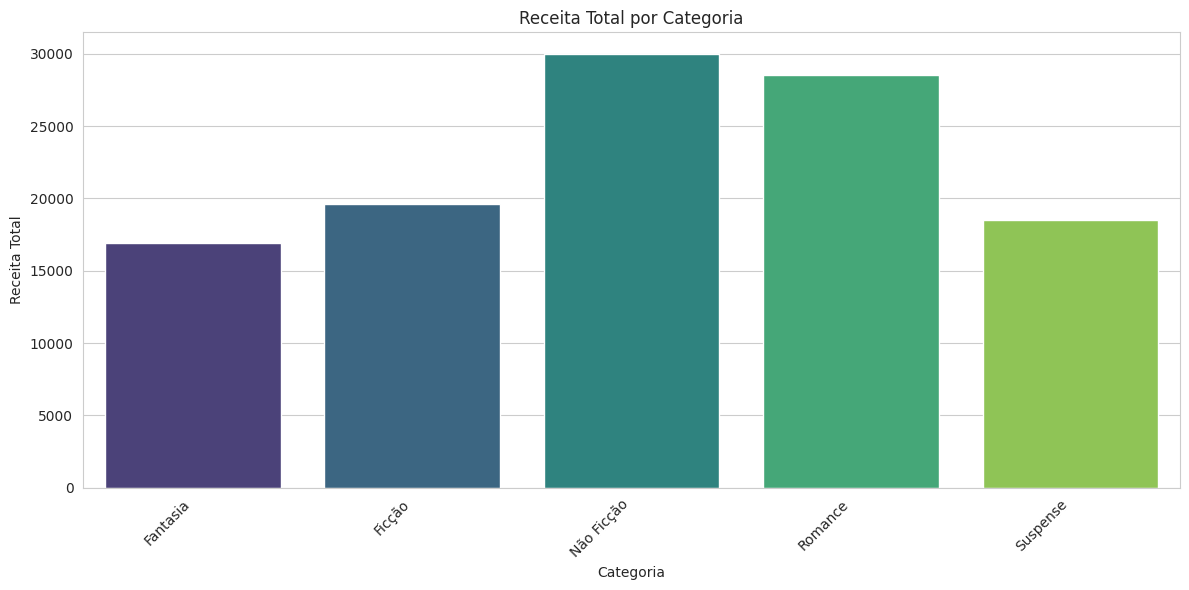

/tmp/ipython-input-266237209.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Categoria', y='Quantidade Total Vendida', data=df_categoria_analise, palette='viridis')


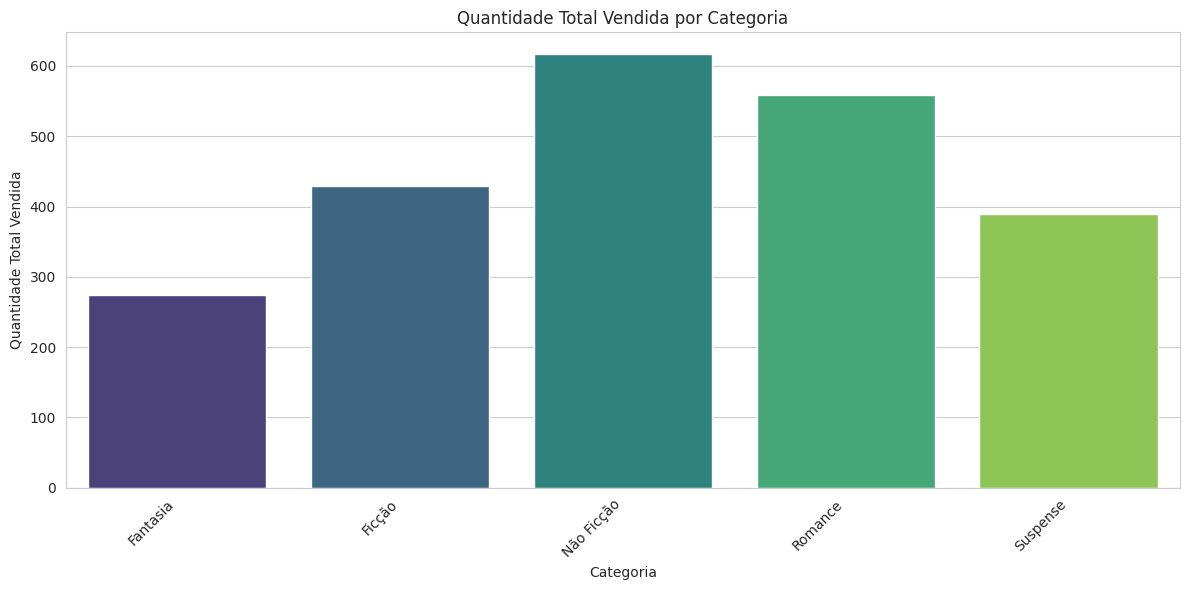

/tmp/ipython-input-266237209.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Categoria', y='Número de Livros', data=df_categoria_analise, palette='viridis')


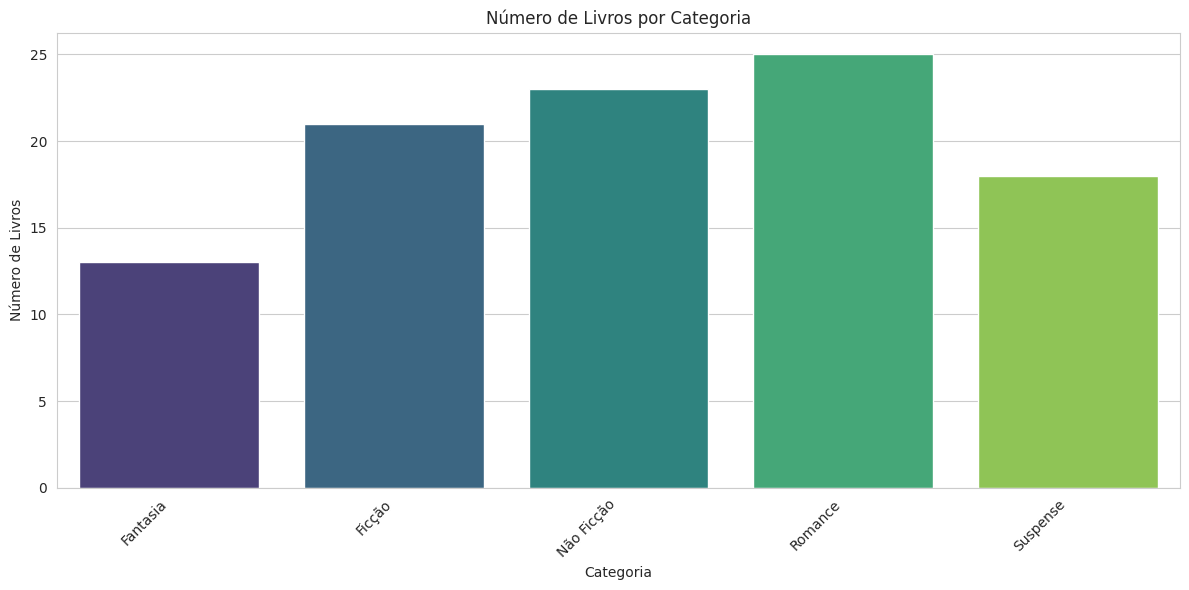

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style('whitegrid')

# Plot 1: Total Revenue by Category
plt.figure(figsize=(12, 6))
sns.barplot(x='Categoria', y='Receita Total', data=df_categoria_analise, palette='viridis')
plt.title('Receita Total por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Receita Total')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot 2: Total Quantity Sold by Category
plt.figure(figsize=(12, 6))
sns.barplot(x='Categoria', y='Quantidade Total Vendida', data=df_categoria_analise, palette='viridis')
plt.title('Quantidade Total Vendida por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Quantidade Total Vendida')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot 3: Number of Books by Category
plt.figure(figsize=(12, 6))
sns.barplot(x='Categoria', y='Número de Livros', data=df_categoria_analise, palette='viridis')
plt.title('Número de Livros por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Número de Livros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The initial attempt to load the sales data from a CSV file failed because the file was not found. A dummy dataset was successfully generated to simulate the book sales data.
*   The dummy dataset contained the required columns: 'Categoria', 'Título', 'Autor', 'Preço', 'Quantidade Vendida', and 'Data Venda', with appropriate data types.
*   The data was found to be clean, with no missing values and correctly assigned data types.
*   The 'Categoria' column already contained the five main categories: 'Romance', 'Suspense', 'Ficção', 'Fantasia', and 'Não Ficção', requiring no further categorization steps.
*   Analysis by category revealed the total revenue, total quantity sold, and the number of books for each category.
*   Visualizations (bar plots) were successfully generated to display the total revenue, total quantity sold, and the number of books for each of the five categories, providing a clear overview of sales performance by category.

### Insights or Next Steps

*   Identify the top-performing categories in terms of total revenue and quantity sold to inform inventory management and marketing strategies.
*   Investigate the average price and quantity sold per book within each category to understand category-specific sales patterns.
